# Titanic ML Project

In [149]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [150]:
#Loading train data
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
# Loading test data
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [152]:
#Counting the dataset
train_data.shape
test_data.shape

(418, 11)

In [153]:
# Dataset summary statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
#Counting number of survivers in the training dataset
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

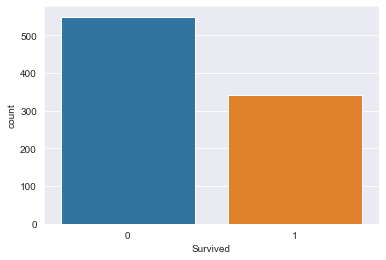

In [155]:
#Visualising the survive coulumn
sns.countplot(train_data['Survived'])

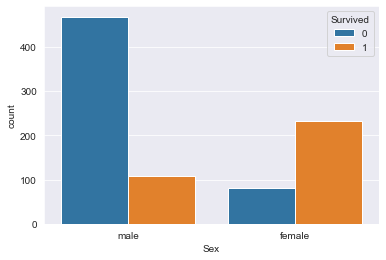

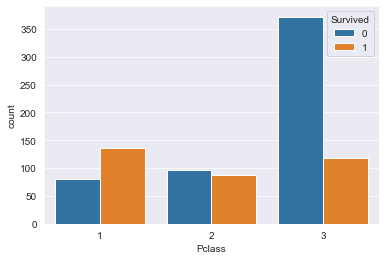

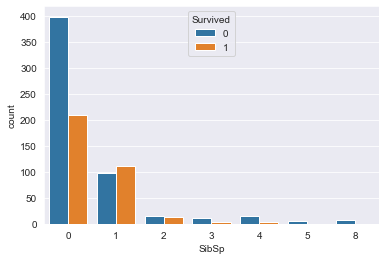

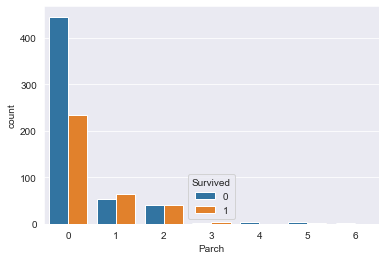

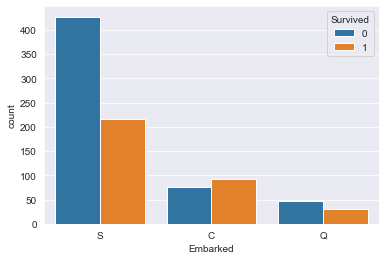

In [156]:
# Visualising other columns in the dataset
cols = ['Sex','Pclass', 'SibSp','Parch', 'Embarked']
for x in cols:
    df = train_data[x]
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(df,hue=train_data['Survived']);

We can infer a few things about the training dataset from the above visuals:
1) More men died and more female survived given their total population in the dataset
2) Fatality was highest in the lower income group, whereas highest income group had the highest survuval rate
3) People who embarked from Southampton had the highest fatality rate whereas people who embarked from Cherbourg had the highest survival rate.


In [157]:
# Lets quatify our pattern regarding sex.
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


Thus men had the highest fatality rate 

In [158]:
# Lets quatify our pattern regarding social class
train_data.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


As you can see from above table the survival rate was highest among first class female and also first class male have highest survival rate among mens.

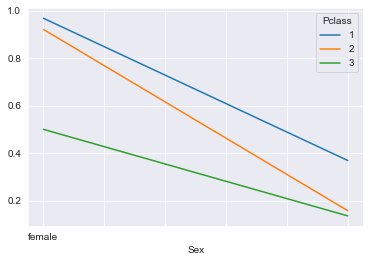

In [159]:
#Visualise the social class and sex pattern together
train_data.pivot_table('Survived',index='Sex',columns='Pclass').plot();

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

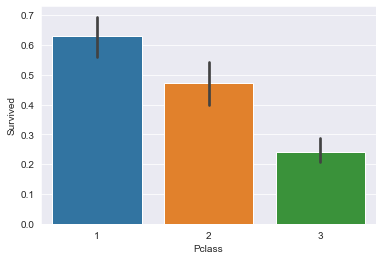

In [160]:
# Barplot for survival rate by social class
sns.barplot(x='Pclass',y= 'Survived', data= train_data)

In [161]:
#Quatifiying survival rate by age , sex and social class
age = pd.cut(train_data['Age'],[0,18,80])
train_data.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

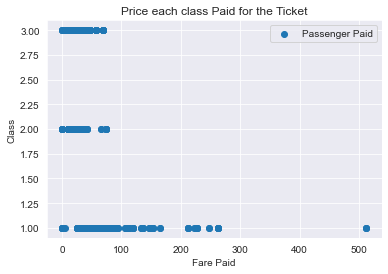

In [162]:
# Visualising fare paid and soial class of the passenger
plt.scatter(train_data['Fare'],train_data['Pclass'], label = 'Passenger Paid')
plt.ylabel ('Class')
plt.xlabel('Fare Paid')
plt.title('Price each class Paid for the Ticket')
plt.legend()
plt.show()

In [84]:
#Lets check for null values in the dataset
#train_data.isna().sum()
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
# remove null values from the dataset
train_data = train_data.dropna(subset=['Age','Embarked'])
train_data = train_data.drop(['Cabin','Ticket'],axis=1) #dropping the cabin column
test_data = test_data.dropna(subset=['Age','Fare'])
test_data = test_data.drop(['Cabin','Ticket'],axis=1)

In [163]:
# Checking the datatype for the dataset
train_data.dtypes
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [164]:
#Encoding columns with object datatype
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
train_data['Sex']=labenc.fit_transform(train_data['Sex'])
train_data['Embarked'] = labenc.fit_transform(train_data['Embarked'])
test_data['Sex'] = labenc.fit_transform(test_data['Sex'])
test_data['Embarked'] = labenc.fit_transform(test_data['Embarked'])

In [165]:
#Defining independent and dependent variables for running models
y_train = train_data['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]
X_train = train_data[features] 
X_test = test_data[features]

In [166]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [167]:
# Creating a function with various ML model
def models (X_train,y_train):
    # Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=1)
    log.fit(X_train,y_train)
    
    # Use Kneighbours Models
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    
    # Use SVC model 
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=1)
    svc_lin.fit(X_train,y_train)
    
    svc_r = SVC(kernel='rbf', random_state=1)
    svc_r.fit(X_train,y_train)
    
    #USe Gaussian NB model 
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    
    # Use Decision Tree Model
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier (criterion='entropy',random_state=1)
    tree.fit(X_train,y_train)
    
    #Use Random Forest Model
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier (n_estimators=100, criterion = 'entropy', random_state=1)
    forest.fit(X_train,y_train)
    
    #Printing the training accuracy for each model
    print ('[0] Logistic Regression Training Accuracy:',log.score(X_train,y_train))
    print ('[1] K Neighbours Training Accuracy:',knn.score(X_train,y_train))
    print ('[2] SVC Linear Training Accuracy:',svc_lin.score(X_train,y_train))
    print ('[3] SVC rbf Training Accuracy:',svc_r.score(X_train,y_train))
    print ('[4] Gaussian NB Training Accuracy:',gnb.score(X_train,y_train))
    print ('[5] Decision Tree Training Accuracy:',tree.score(X_train,y_train))
    print ('[6] Random Forest Training Accuracy:',forest.score(X_train,y_train))
    
    return log , knn,svc_lin,svc_r,gnb,tree,forest


In [168]:
#Calculating the accuracy of the models defined above 
model = models (X_train,y_train)

[0] Logistic Regression Training Accuracy: 0.7912457912457912
[1] K Neighbours Training Accuracy: 0.8249158249158249
[2] SVC Linear Training Accuracy: 0.7867564534231201
[3] SVC rbf Training Accuracy: 0.819304152637486
[4] Gaussian NB Training Accuracy: 0.7890011223344556
[5] Decision Tree Training Accuracy: 0.8372615039281706
[6] Random Forest Training Accuracy: 0.8372615039281706


So now we predict the survival using the Random Forest model

In [170]:
#Constructing the model for prediction
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier (n_estimators=100, criterion = 'entropy', random_state=1)
rfmodel.fit(X_train,y_train)
prediction = rfmodel.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [171]:
pred = pd.read_csv('submission.csv')
pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [148]:
ori = pd.read_csv('gender_submission.csv')
ori

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
